# Step 1. Importing libraries and dataframes 

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create a path

path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/Instacart Basket Analysis'

#Import the df 

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data ', 'Prepared data', 'ords_prods_cust_merge.pkl'))

In [3]:
#Check the column names 
ords_prods_cust_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   user_id                        object  
 1   First Name                     object  
 2   Last Name                      object  
 3   Gender                         object  
 4   STATE                          object  
 5   Age                            int64   
 6   date_joined                    object  
 7   Number of dependants           int64   
 8   fam_status                     object  
 9   income                         int64   
 10  product_id                     int64   
 11  product_name                   object  
 12  aisle_id                       int64   
 13  department_id                  int64   
 14  prices                         float64 
 15  order_id                       int64   
 16  order_number                   int64   
 17  orders_day_of_week       

In [4]:
ords_prods_cust_merge['orders_time'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: orders_time, dtype: int64

# Step 2. Already done

# Step 3. Histogram of the 'order_hour_of_day' ('order_time') column

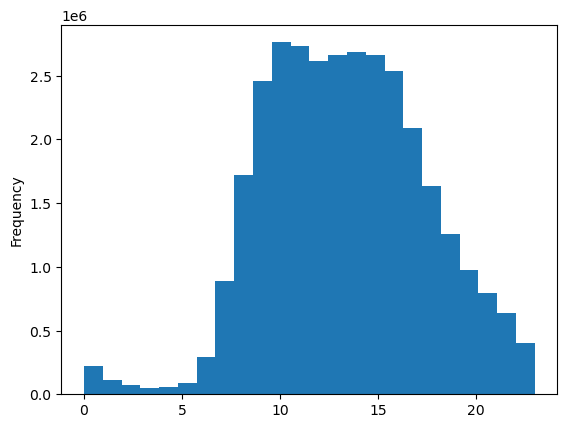

In [5]:
hist_orders_time = ords_prods_cust_merge['orders_time'].plot.hist(bins=24)

**The histogram shows that most of the sales happened between 10 am and 5 pm, with the peak at 10 am.**

# Step 4. Bar chart from the “loyalty_flag” column

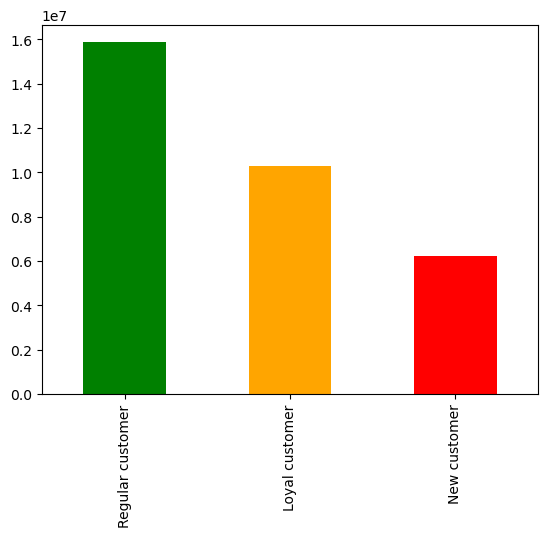

In [6]:
loyalty_customers = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['green', 'orange', 'red'])

# Step 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. Create a line chart from a sample 

In [7]:
#Creating a sample
#Assign random numbers to the data value randomly (<0.7)

np.random.seed(4)


In [8]:
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [9]:
#Check the array 
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
#Split the dev list into two ('big' and 'small')
#Store 70% of the df 
big = ords_prods_cust_merge[dev]

In [11]:
#Store 30% of the df

small = ords_prods_cust_merge[~dev]

In [12]:
#Reduce the df to the relevant columns 

ords_prods_cust_merge_2 = small[['prices', 'orders_time']]

In [13]:
#Checking the length of both samples together. It is the same as the whole df
len(big) + len(small)

32404859

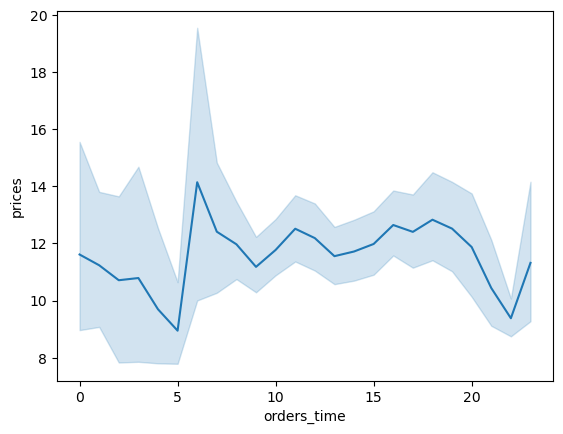

In [14]:
#Create a line chart 

line_prices_orders_time = sns.lineplot(data = ords_prods_cust_merge_2, x = 'orders_time', y = 'prices')

**The expendures begin rising at 6 am and go down at 9 pm**

# Step 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [15]:
#Create a subset for the line chart 

ords_prods_cust_merge_3 = small[['Age', 'Number of dependants']]

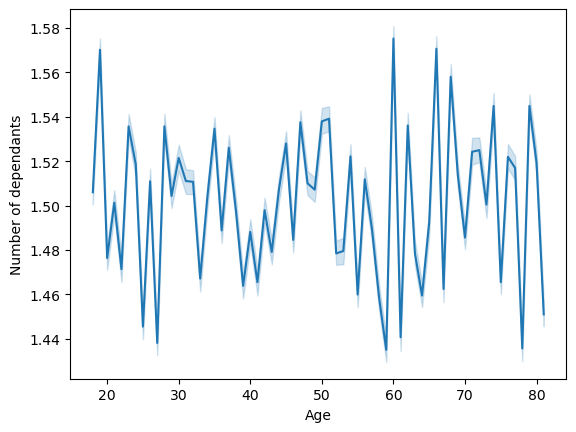

In [16]:
#Create a line chart 

line_age_status = sns.lineplot(data = ords_prods_cust_merge_3, x = 'Age', y = 'Number of dependants')

**There are more dependants of the people of age 60 and approx. 65. Between 20 and 60, the number of dependants is generally low**

# Step 7. Explore whether there’s a connection between age and spending power (income). Create a scatterplot 

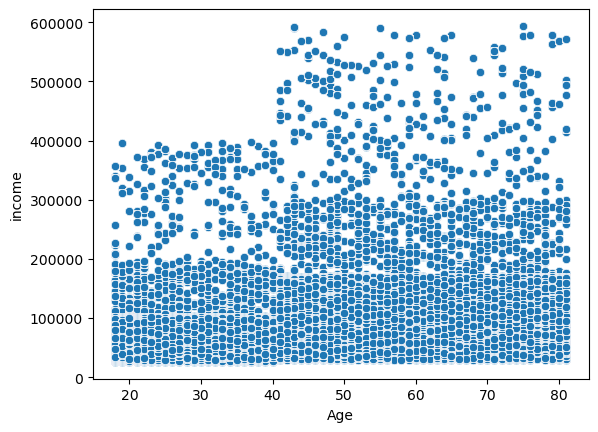

In [17]:
#Create a scatterplot

scatter_income_age = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust_merge)

**There is a relatively high dispersion of income values in general. Starting with age 40, income gets higher (there is a big proportion of people earning between 200,000 and 300,000 between 40 and 80 y.o..  There are no people who earn more than 400,000 and who are younger than 40. However, there is a proportion of 20-40 y.o. people who earn between 200,000 and 400,000. Nevertheless, the majority of incomes still lie under 200,000.**

# Step 8. Exporting viz



In [18]:
hist_orders_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_time.png'))

In [19]:
scatter_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))

In [20]:
line_age_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_status.png'))

In [21]:
loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_customers.png'))

In [22]:
line_prices_orders_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_time.png'))